#Introducción
Platzi -Escuela de Ciencia de Datos 

*Análisis de Series de Tiempo (TSA)*

Obtendremos la información de la siguiente página : https://www.quandl.com/

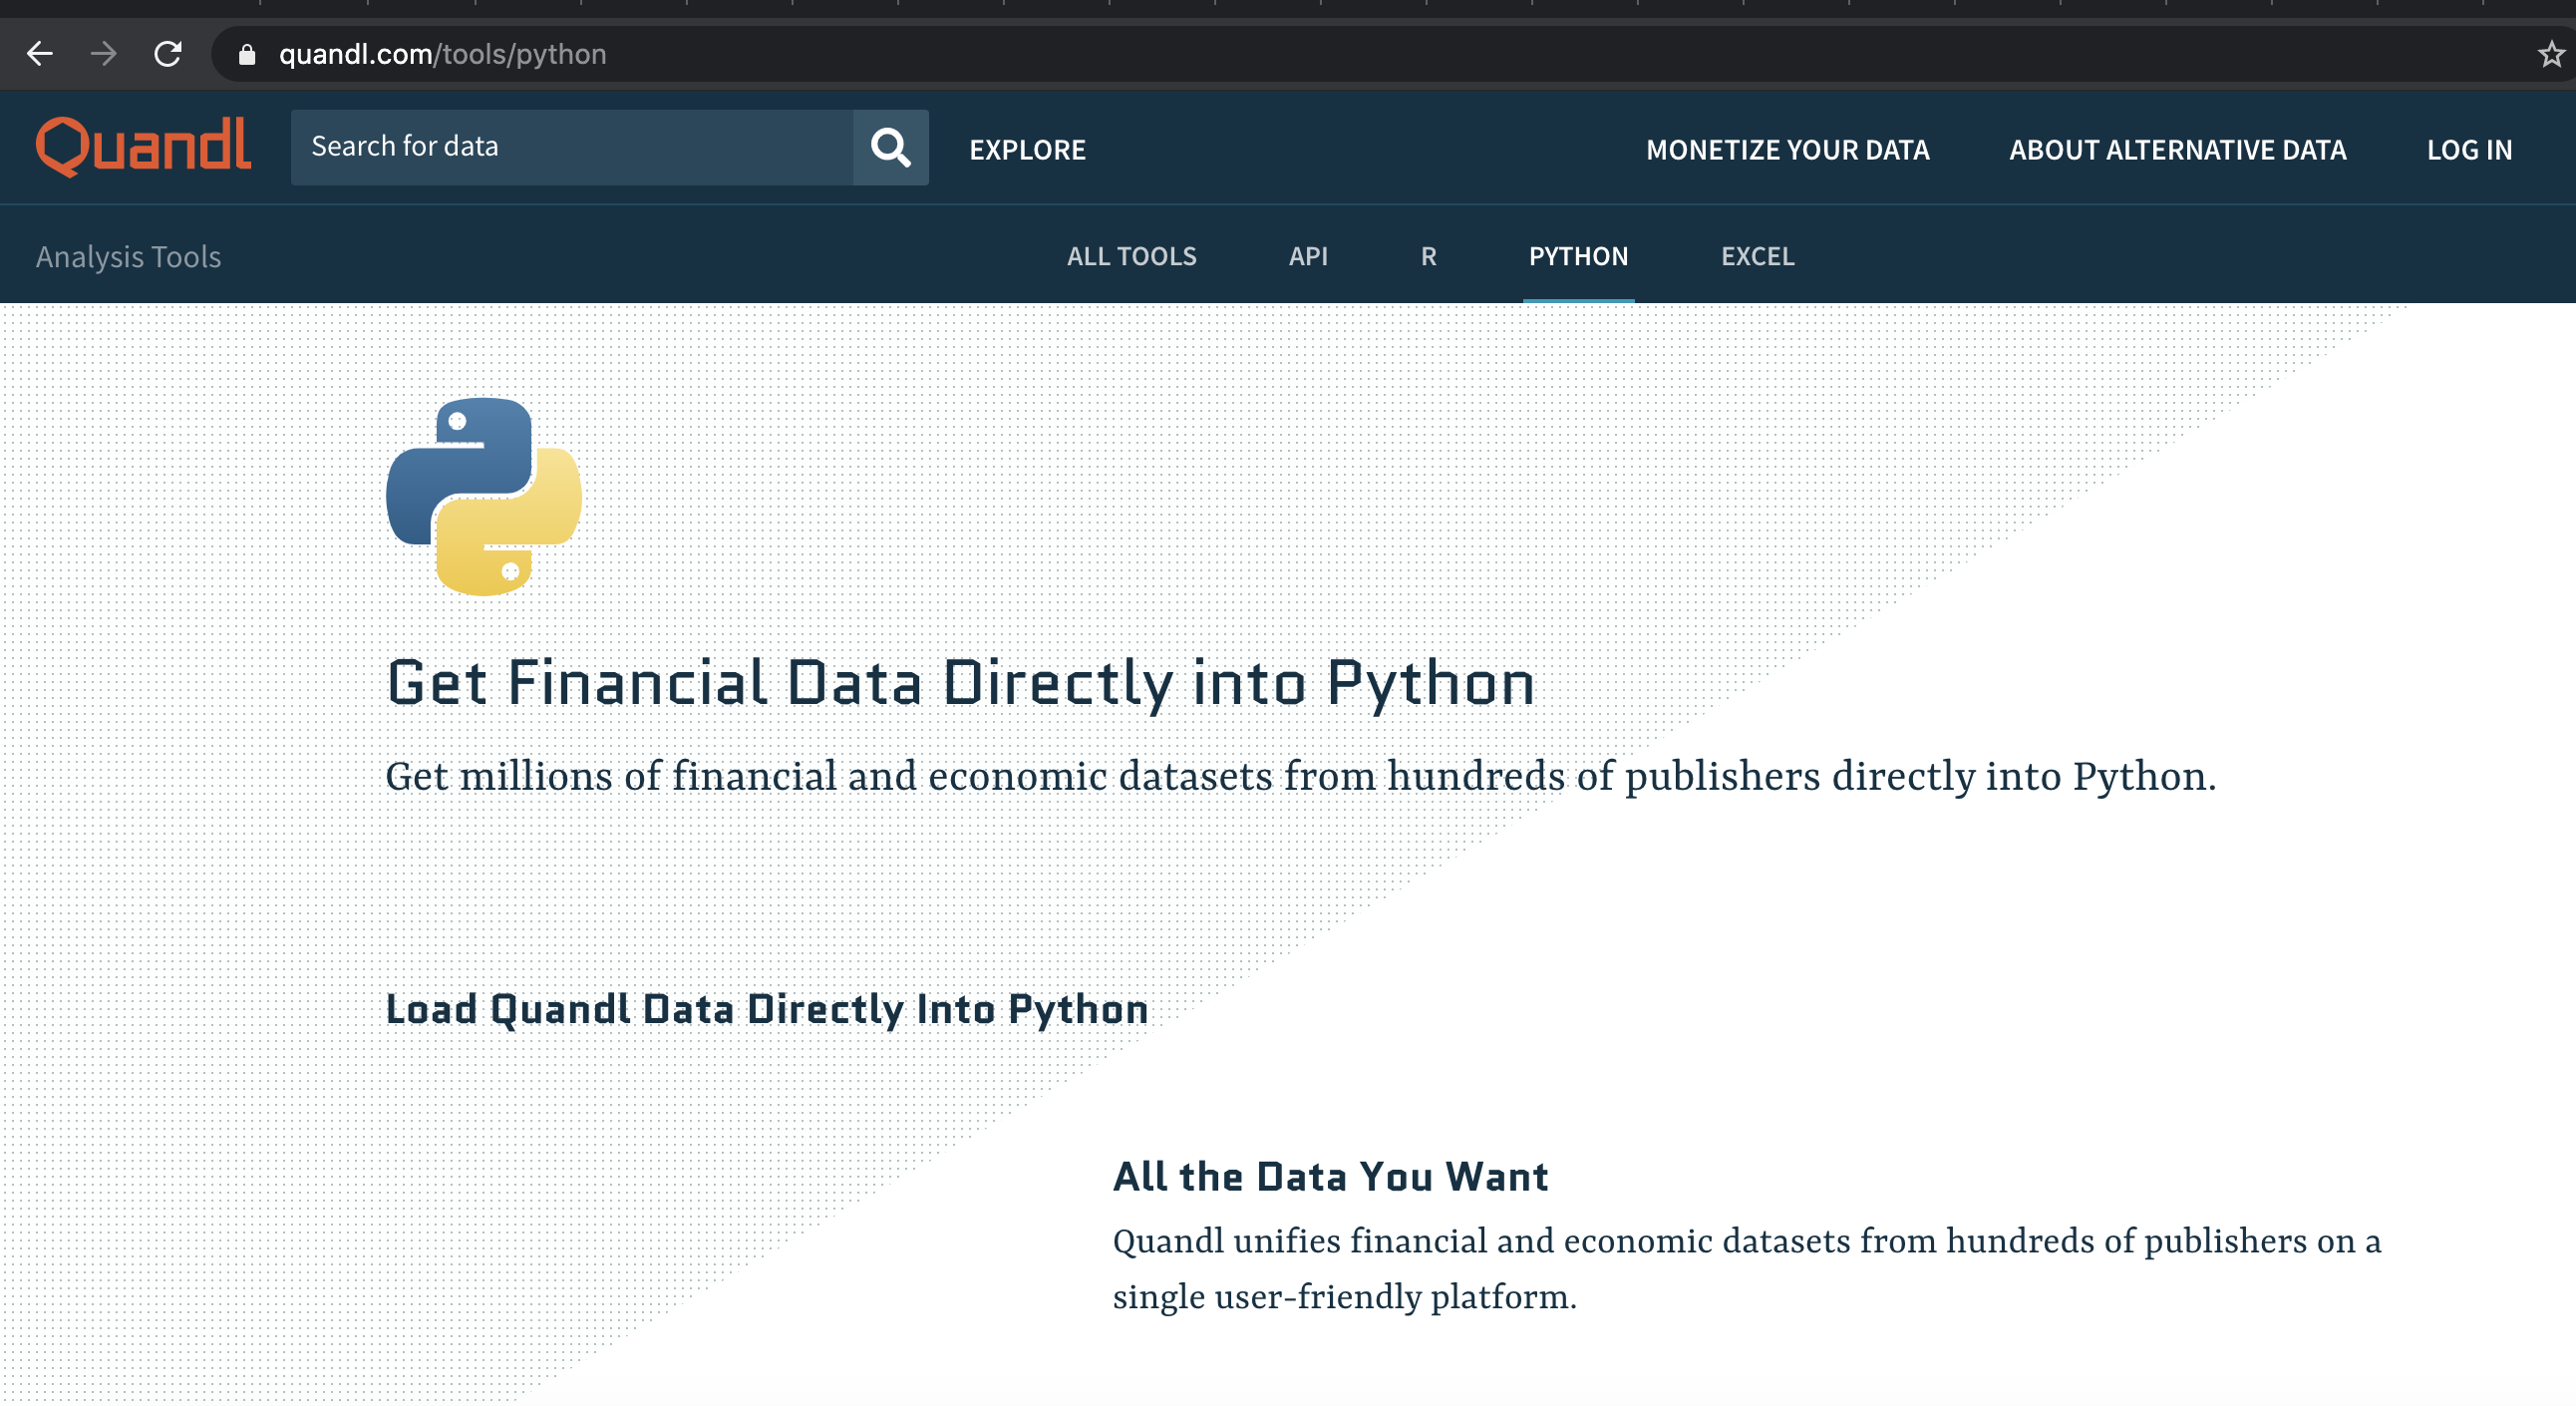

In [ ]:
#!pip install quandl

In [ ]:
import quandl
QUANDL_API_KEY = '4sLKuvo8LszEsAF1Kqgr'  # Your Quandl key here
quandl.ApiConfig.api_key = QUANDL_API_KEY

In [ ]:
mydata = quandl.get("FRED/GDP")


In [ ]:
mydata

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2019-07-01,21540.325
2019-10-01,21747.394
2020-01-01,21561.139


In [ ]:
df = quandl.get('CHRIS/CME_GC1', column_index=6, collapse='weakly', start_date='2010-01-01')

In [ ]:
df['Settle'].resample('MS').ffill().dropna() #agrupamiento por mes  

Date
2010-02-01    1104.3
2010-03-01    1118.3
2010-04-01    1125.1
2010-05-01    1180.7
2010-06-01    1224.8
               ...  
2020-08-01    1962.8
2020-09-01    1970.8
2020-10-01    1908.4
2020-11-01    1879.9
2020-12-01    1814.1
Freq: MS, Name: Settle, Length: 131, dtype: float64

In [ ]:
df_settle = df['Settle'].resample('MS').ffill().dropna() #agrupamiento por mes  

In [ ]:
df_rolling = df_settle.rolling(3) #ventana dinámica 
df_mean = df_rolling.mean() #media  
df_std = df_rolling.std() # desviación estándar


In [ ]:
import matplotlib.pyplot as plt

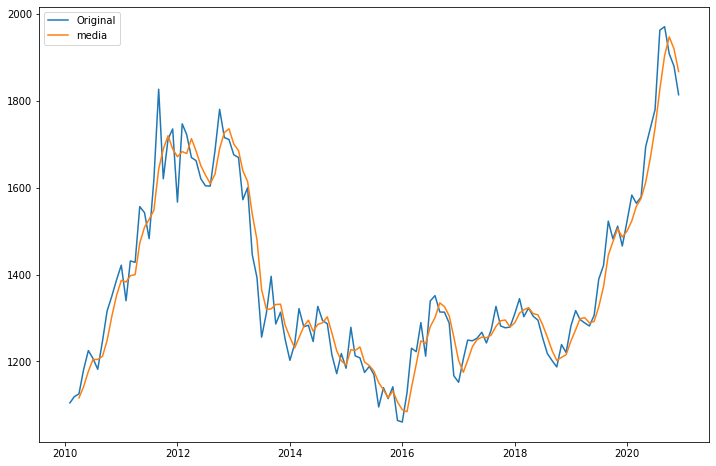

In [ ]:
  plt.figure(figsize=(12, 8))
  plt.plot(df_settle, label='Original')
  plt.plot(df_mean, label='media')
  plt.legend()

In [ ]:
#descomposición 
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
decompose_result = seasonal_decompose(df.dropna(), freq=12) #  12 es el número de periodos 
df_trend = decompose_result.trend 
df_season = decompose_result.seasonal
df_residual = decompose_result.resid



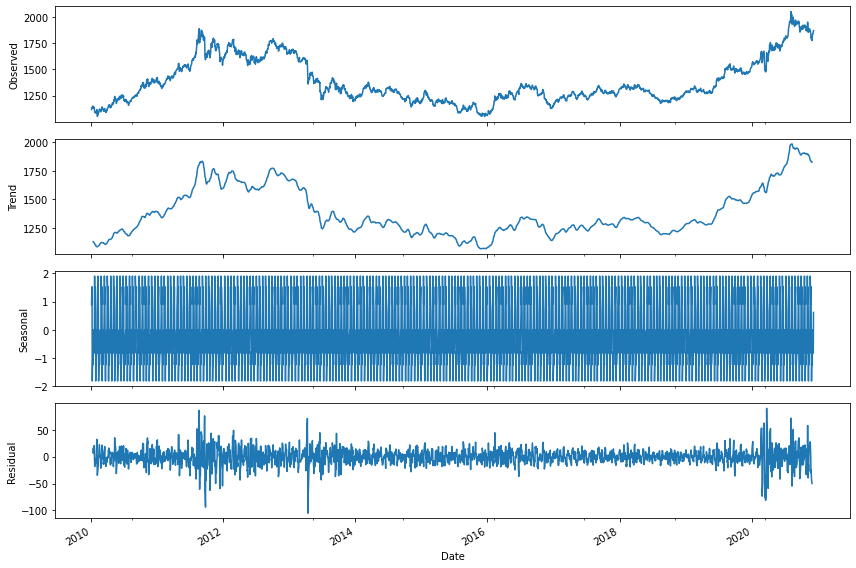

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
fig = decompose_result.plot()

SARIMAX - Predicción de los valores futuros 


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

In [ ]:
#determinar si es estacionaria Dickey-Fuller Test

result = adfuller(df['Settle'])


In [ ]:

print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

p-value: 0.675682451403725
Critical Values:
	1%: -3.4327414664215854
	5%: -2.862596577381869
	10%: -2.5673324502397423


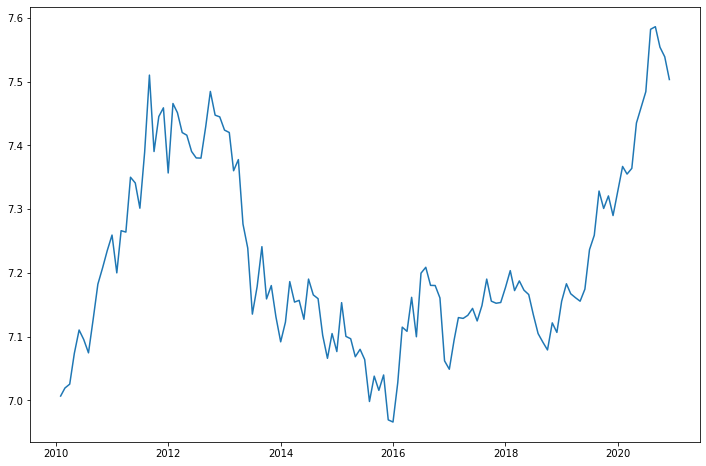

In [ ]:
df_log = np.log(df_settle)
plt.plot(df_log)

In [ ]:
rolling_mean = df_log.rolling(window=12).mean()
df_mean = df_log - rolling_mean
df_mean.dropna(inplace=True)